# Master en fouille de données et intelligence artificielle</h2>
### Projet pour la validation du module ML-Apprentissage Supervisé et Feature engineering
#### L’apprentissage supervisé avec Scikit-Learn

Un test de classification de bout en bout
Comme dernière étape, vous recevez un ensemble de données appelé data/ccdefault.csv. L'ensemble de données représente le défaut des clients des cartes de crédit. Il a 30 000 cas et 24 attributs différents. Plus de détails sur l'ensemble de données sont disponibles sur data/ccdefault.txt. Dans cette tâche, vous devez créer trois modèles, comparer leurs résultats et trouver la solution idéale. Voici les étapes suggérées :
1.	Chargez les données.
2.	Effectuez des analyses exploratoires (par exemple, comment les diverses caractéristiques et la variable cible sont distribuées).
3.	Entraînez un modèle pour prédire la variable cible (risque de "par défaut").
○	Utiliser trois modèles différents (régression logistique, arbre de décision et forêt aléatoire).
	○	Comparer les performances des modèles (par exemple, AUC).
○	Défendre votre choix du meilleur modèle (par exemple, quelles sont les forces et les faiblesses de chacun de ces modèles ?).
4.	Que feriez-vous de plus avec ces données ? Quelque chose pour vous aider à trouver une meilleure solution ?
5.	Mettre votre solution sur github et m'envoyez le lien.
6.	Possibilit

In [30]:
# Importation des librairies
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
pd.options.mode.chained_assignment = None  # default='warn'
from ipykernel import kernelapp as app
import os
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
#importation de la librairie de calcul 

## 1. Changement de données

In [31]:
path='C:/Users/hp/Documents/Formation_Python/ML/data/'
data = pd.read_csv(path+'ccdefault.csv')

## 2. Analyses exploratoires

In [3]:
data
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Affichage des dimensions de la base de données
print(f'La base de données contient {data.shape[0]} cas et {data.shape[1]} variables ou attributs')

La base de données contient 30000 cas et 25 variables ou attributs


In [5]:
# Description des observations
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Détermination du nombre de cartes de credits avec défaut

In [6]:
#vérifier la distribution absolue des classes 
print(data.DEFAULT.value_counts()) 

0    23364
1     6636
Name: DEFAULT, dtype: int64


In [7]:
#la distribution relative 
print(data.DEFAULT.value_counts(normalize=True)) 

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64


In [8]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [9]:
#information sur les variables 
print(data.info()) 
      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [10]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [33]:
# Variable à modéliser
y = data["DEFAULT"]

# variables explicatives
x = data.drop("DEFAULT", axis = 1)
x = x.drop("ID", axis = 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x, 
                                                     y, 
                                                     test_size=0.25, 
                                                     random_state=42)
svc = SVC(random_state=42)
svc.fit(x_train, y_train)

SVC(random_state=42)

On utilise un échantillon de test représentant 25% des données.

## 3.	Entraînez un modèle pour prédire la variable cible (risque de "par défaut").
##### a. Utiliser trois modèles différents (régression logistique, arbre de décision et forêt aléatoire).
##### b. Comparer les performances des modèles (par exemple, AUC).
##### c. Défendre votre choix du meilleur modèle (par exemple, quelles sont les forces et les faiblesses de chacun de ces modèles ?).

#### a.1. Régression logistique

In [34]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
titan_logit=logit.fit(x, y)
# Erreur sur l'écahntillon test
1-titan_logit.score(x_test, y_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.2169333333333333

In [16]:
#importation de l'outil 
from statsmodels.tools import add_constant 
import statsmodels as sm
#données X avec la constante 
XTrainBis = sm.tools.add_constant(x_train) 
 
#vérifier la structure 
print(XTrainBis.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 21177 to 23654
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      22500 non-null  float64
 1   LIMIT_BAL  22500 non-null  int64  
 2   SEX        22500 non-null  int64  
 3   EDUCATION  22500 non-null  int64  
 4   MARRIAGE   22500 non-null  int64  
 5   AGE        22500 non-null  int64  
 6   PAY_0      22500 non-null  int64  
 7   PAY_2      22500 non-null  int64  
 8   PAY_3      22500 non-null  int64  
 9   PAY_4      22500 non-null  int64  
 10  PAY_5      22500 non-null  int64  
 11  PAY_6      22500 non-null  int64  
 12  BILL_AMT1  22500 non-null  int64  
 13  BILL_AMT2  22500 non-null  int64  
 14  BILL_AMT3  22500 non-null  int64  
 15  BILL_AMT4  22500 non-null  int64  
 16  BILL_AMT5  22500 non-null  int64  
 17  BILL_AMT6  22500 non-null  int64  
 18  PAY_AMT1   22500 non-null  int64  
 19  PAY_AMT2   22500 non-null  int64  
 20  PA

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [56]:
#visualisation des premières lignes de la structure 
#premières lignes 
print(XTrainBis.head()) 

       const  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
21177    1.0     300000    1          3         2   31      0      0      0   
23942    1.0      20000    1          2         2   24      0      0      0   
1247     1.0      90000    2          2         2   35     -1     -1     -1   
23622    1.0     300000    2          2         1   40      1     -2     -2   
28454    1.0      70000    2          2         2   36      0      0      0   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
21177      0  ...      84462      86263      87238      89176      4000   
23942      0  ...      35036      14694      16914      14074      1313   
1247      -2  ...          0          0          0          0      2667   
23622     -2  ...          0          0          0          0         0   
28454      0  ...      59165      29314      28844      29443      3340   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
21177      4000 

In [57]:
#importation de la classe de calcul 
from statsmodels.api import Logit 
 
#régression logistique - on passe la cible et les explicatives 
lr = Logit(endog=y_train,exog=XTrainBis) 
 
#lancer les calculs 
#algorithme de Newton-Raphson utilisé par défaut 
#https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.fit.html 
res = lr.fit() 

Optimization terminated successfully.
         Current function value: 0.464904
         Iterations 7


In [58]:
# Coefficients
#résumé des résultats 
print(res.summary()) 

                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22476
Method:                           MLE   Df Model:                           23
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                  0.1232
Time:                        13:40:21   Log-Likelihood:                -10460.
converged:                       True   LL-Null:                       -11930.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7028      0.137     -5.112      0.000      -0.972      -0.433
LIMIT_BAL  -7.919e-07   1.81e-07     -4.374      0.000   -1.15e-06   -4.37e-07
SEX           -0.1068      0.035     -3.009      0.0

### Utilisation de statsmodels

Statsmodels est l'outils l’explication de la régression logistique, il fournie des sorties rassurantes pour les utilisateurs habitués aux logiciels de statistique classique

In [60]:
# on ajoute une colonne pour la constante
#importation de l'outil 
from statsmodels.tools import add_constant 
x_stat = sm.tools.add_constant(x_test)
# on ajuste le modèle
model = Logit(y_test, x_stat)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.461504
         Iterations 7


In [62]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7476
Method:                           MLE   Df Model:                           23
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                  0.1176
Time:                        13:41:08   Log-Likelihood:                -3461.3
converged:                       True   LL-Null:                       -3922.5
Covariance Type:            nonrobust   LLR p-value:                4.017e-180
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6271      0.236     -2.660      0.008      -1.089      -0.165
LIMIT_BAL  -6.318e-07   3.16e-07     -2.002      0.045   -1.25e-06   -1.33e-08
SEX           -0.1081      0.061     -1.761      0.078      -0.228       0.012
EDUCATION     -0.1212      0.043     -2.833      0.005      -0.205      -0.037
MARRIAGE      -0.1352      0.064     -2.121      0.034      -0.260      -0.010
AGE            0.0056      0.004      1.561      0.119      -0.001       0.013
PAY_0          0.5657      0.035     15.968      0.000       0.496       0.635
PAY_2          0.0525      0.040      1.325      0.185      -0.025       0.130
PAY_3          0.0683      0.044      1.557      0.119      -0.018       0.154
PAY_4         -0.0056      0.050     -0.112      0.911      -0.103       0.092
PAY_5          0.0629      0.054      1.163      0.245      -0.043       0.169
PAY_6         -0.0176      0.046     -0.383      0.702      -0.108       0.073
BILL_AMT1  -5.034e-06   2.29e-06     -2.198      0.028   -9.52e-06   -5.44e-07
BILL_AMT2   1.604e-06   3.13e-06      0.513      0.608   -4.52e-06    7.73e-06
BILL_AMT3  -4.666e-08   2.82e-06     -0.017      0.987   -5.57e-06    5.47e-06
BILL_AMT4   1.967e-06   2.88e-06      0.683      0.495   -3.68e-06    7.61e-06
BILL_AMT5   1.848e-06    3.2e-06      0.578      0.563   -4.42e-06    8.11e-06
BILL_AMT6   5.997e-07   2.43e-06      0.246      0.805   -4.17e-06    5.37e-06
PAY_AMT1   -2.859e-05   6.51e-06     -4.395      0.000   -4.13e-05   -1.58e-05
PAY_AMT2   -1.027e-05   4.32e-06     -2.378      0.017   -1.87e-05   -1.81e-06
PAY_AMT3   -4.043e-06    3.4e-06     -1.190      0.234   -1.07e-05    2.61e-06
PAY_AMT4    -1.02e-05   4.58e-06     -2.230      0.026   -1.92e-05   -1.23e-06
PAY_AMT5   -1.069e-05   4.76e-06     -2.244      0.025      -2e-05   -1.36e-06
PAY_AMT6    3.696e-07   2.37e-06      0.156      0.876   -4.28e-06    5.02e-06
==============================================================================
"""

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


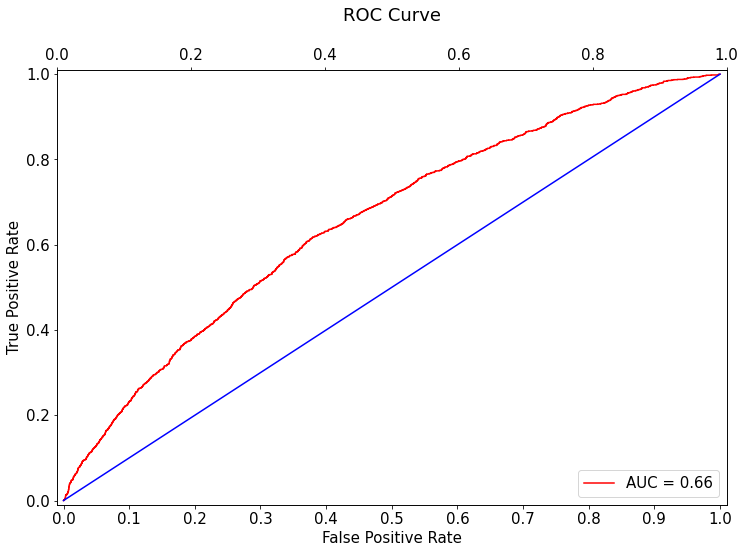

In [18]:

clf = LogisticRegression().fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

import matplotlib
font = {'family' : 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)

import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
from sklearn.metrics import auc, roc_curve

fig = plt.figure(figsize=(12, 8))
values = []
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

def plot_roc(y_test, clf):
    y_pred = clf.predict_proba(x_test)[:, 1]
    fpr, tpr, ths = roc_curve(y_test, y_pred)
    auc_val = auc(fpr, tpr)
    ax1.plot(fpr, tpr, color="red", label="AUC = {0:.2f}".format(auc_val))
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    plt.title("ROC Curve\n")
    ax1.set_xlim((-0.01, 1.01))
    ax1.set_ylim((-0.01, 1.01))
    ax1.set_xticks(np.linspace(0, 1, 11))
    ax1.plot([0, 1], [0, 1], color="blue")
    ax1.legend(loc="lower right")
    plt.show()

plot_roc(y_test, clf)

#### k nearest neighbors (kNN)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
digit_knn=knn.fit(x_train, y_train) 
# Estimation de l'erreur de prévision
# sur l'échantillon test
1-digit_knn.score(x_test,y_test)

0.22106666666666663

In [64]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs
param=[{"n_neighbors":list(range(1,15))}]
knn= GridSearchCV(KNeighborsClassifier(),param,cv=5,n_jobs=-1)
digit_knnOpt=knn.fit(x_train, y_train)
# paramètre optimal
digit_knnOpt.best_params_["n_neighbors"]

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.76493333 0.73524444 0.76644444        nan 0.77035556
        nan 0.77151111 0.76346667 0.77271111 0.76826667 0.77484444
 0.77075556 0.77564444]
  category=UserWarning


14

col_0       0    1
DEFAULT           
0        5692  181
1        1494  133


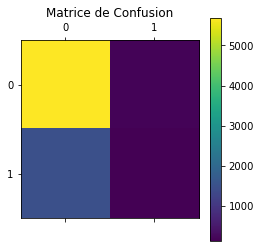

In [65]:
# Prévision
y_chap = digit_knnOpt.predict(x_test)
# matrice de confusion
table=pd.crosstab(y_test,y_chap)
print(table)
plt.matshow(table)
plt.title("Matrice de Confusion")
plt.colorbar()
plt.show()

In [66]:
nom_default_cible = dict( zip (data.DEFAULT.unique(), data.ID.unique()))
print( nom_default_cible )

#instanciation du modèle
modele_regLog = linear_model.LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')
#training
modele_regLog.fit(x_train,y_train)
#précision du modèle
precision = modele_regLog.score(x_test,y_test)
print(precision*100)

{1: 1, 0: 2}
78.30666666666667


In [70]:
#prédiction
prediction_default = modele_regLog.predict([[100000,2,2,56,0,1,1,0,-2,1,2,1000,1000,1000,1500,1000,1000,1,1,0,-2,1,2]])
nom_default_cible[prediction_default[0]]

2

In [74]:
#prédiction
prediction_default = modele_regLog.predict([[0,1,2,4,25,1,0,0,1,1,2,1500,100,10,1500,1,15000,1,1,0,-2,1,2]])
nom_default_cible[prediction_default[0]]

2

#### a.1.1. Avantages et limites du modèle de regression logistique

##### a.1.1.1. Avantages

La régression logistique est un algorithme de classification simple et efficace, alors il ne nécessite pas une grande puissance de calcul et il est facile à mettre en œuvre.
La régression logistique fournit un score de probabilité pour les observations.

#### a.1.1.2. Limites

La régression logistique n’est pas adaptée à un  grand nombre de caractéristiques. Cet algorithme ne peut pas résoudre le problème de non-linéarité ce qui nécessite la transformation des caractéristiques non linéaires.

Ainsi, la régression logistique ne fonctionne pas bien avec des variables indépendantes qui ne sont pas corrélées à la variable cible et qui sont très similaires entre elles.

#### a.2. arbre de décision 

In [19]:
print(x_train.shape)
print(x_test.shape) 

(22500, 23)
(7500, 23)


In [20]:
#vérification des distributions en apprentissage 
print(y_train.value_counts(normalize=True)) 

0    0.777378
1    0.222622
Name: DEFAULT, dtype: float64


In [21]:
#vérification des distributions en apprentissage 
print(y_test.value_counts(normalize=True)) 

0    0.783067
1    0.216933
Name: DEFAULT, dtype: float64


In [22]:
#instanciation de l'arbre 
from sklearn.tree import DecisionTreeClassifier 
arbreFirst = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10) 

In [23]:
#construction de l'arbre 
arbreFirst.fit(X = x_train.iloc[:,:-1], y = y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30)

[Text(251.96078149112543, 213.93290322580646, 'AGE <= 1.5\ngini = 0.346\nsamples = 22500\nvalue = [17491, 5009]'),
 Text(200.41823614246493, 206.91870967741934, 'PAY_0 <= 1.5\ngini = 0.277\nsamples = 20122\nvalue = [16777, 3345]'),
 Text(127.02778354020188, 199.90451612903226, 'PAY_AMT2 <= 573.5\ngini = 0.245\nsamples = 18452\nvalue = [15814, 2638]'),
 Text(48.619666701340954, 192.89032258064515, 'PAY_6 <= 533.5\ngini = 0.341\nsamples = 4882\nvalue = [3818, 1064]'),
 Text(29.752814763679005, 185.87612903225806, 'MARRIAGE <= 60.5\ngini = 0.401\nsamples = 1987\nvalue = [1435, 552]'),
 Text(25.128363247782424, 178.86193548387098, 'PAY_AMT3 <= 1000.5\ngini = 0.396\nsamples = 1953\nvalue = [1422, 531]'),
 Text(17.09523386227375, 171.84774193548387, 'MARRIAGE <= 36.5\ngini = 0.41\nsamples = 1676\nvalue = [1194, 482]'),
 Text(5.7907552058706715, 164.83354838709678, 'PAY_AMT2 <= 502.5\ngini = 0.379\nsamples = 947\nvalue = [706, 241]'),
 Text(5.385497323775841, 157.81935483870967, 'BILL_AMT1 <=

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


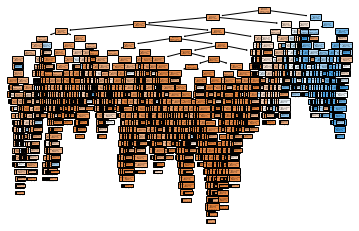

In [24]:
#affichage graphique de l'arbre - depuis sklearn 0.21 
from sklearn.tree import plot_tree 
plot_tree(arbreFirst,feature_names = list(data.columns[:-1]),filled=True)

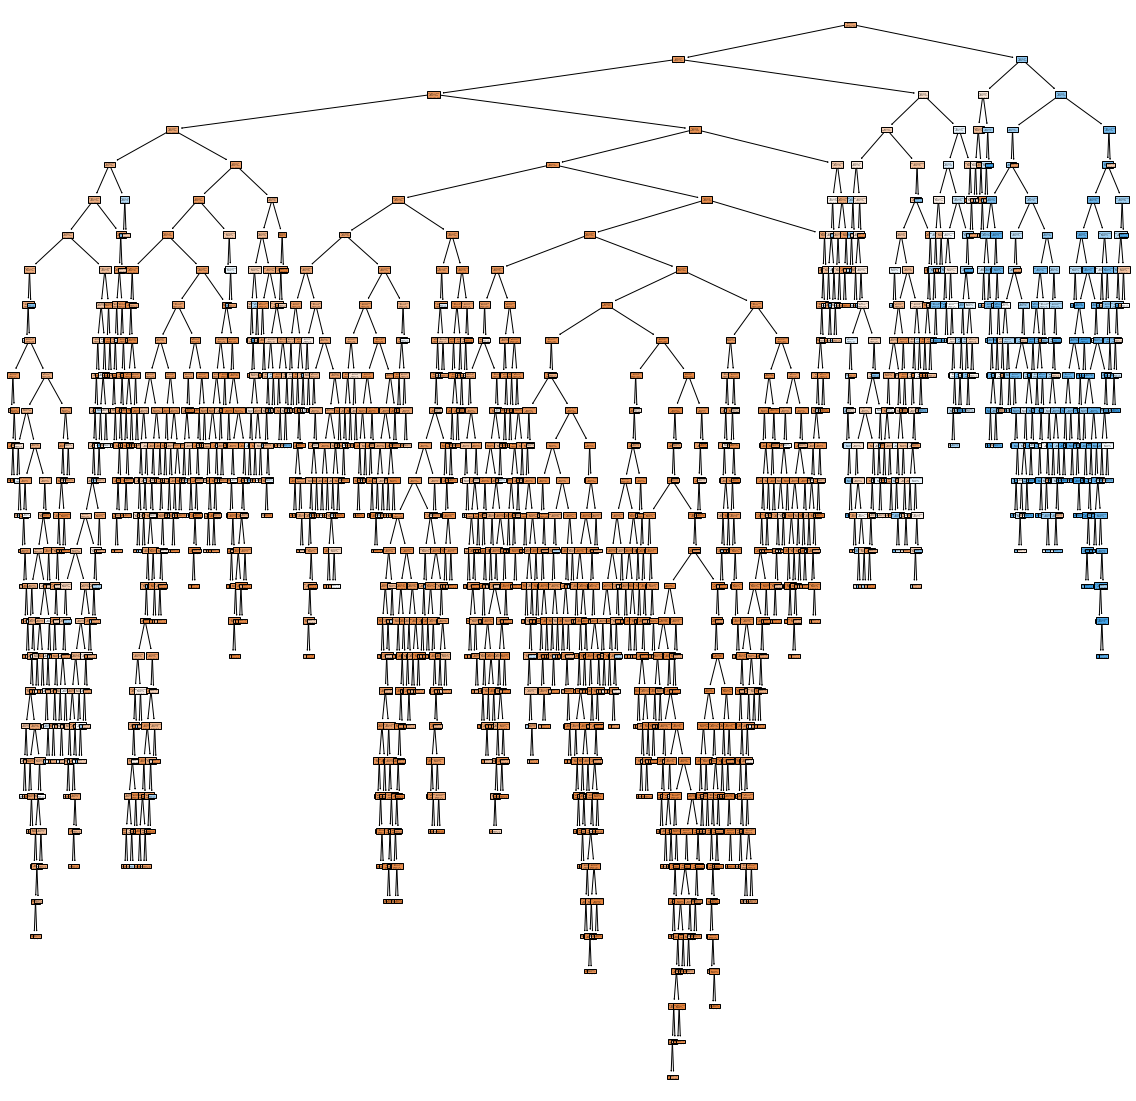

In [25]:
#affichage plus grand pour une meilleure lisibilité 
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,20)) 
plot_tree(arbreFirst,feature_names = list(data.columns[:-1]),filled=True) 
plt.show()

In [26]:
#affichage sous forme de règles 
#plus facile à appréhender quand l'arbre est très grand 
from sklearn.tree import export_text 
tree_rules = export_text(arbreFirst,feature_names = list(x_train.columns[:-1]),show_weights=True)

In [27]:
#importance des variables 
impVarFirst={"Variable":x_train.columns[:-1],"Importance":arbreFirst.feature_importances_} 
print(pd.DataFrame(impVarFirst).sort_values(by="Importance",ascending=False))

     Variable  Importance
5       PAY_0    0.366825
6       PAY_2    0.075483
19   PAY_AMT3    0.055736
11  BILL_AMT1    0.051404
18   PAY_AMT2    0.047488
0   LIMIT_BAL    0.044710
4         AGE    0.040573
16  BILL_AMT6    0.036972
21   PAY_AMT5    0.035012
20   PAY_AMT4    0.033198
12  BILL_AMT2    0.031831
17   PAY_AMT1    0.031557
13  BILL_AMT3    0.030722
14  BILL_AMT4    0.027453
15  BILL_AMT5    0.023328
8       PAY_4    0.015805
2   EDUCATION    0.013317
7       PAY_3    0.011991
10      PAY_6    0.010665
3    MARRIAGE    0.006442
9       PAY_5    0.005425
1         SEX    0.004062


In [28]:
#prédiction sur l'échantillon test 
predFirst = arbreFirst.predict(X=x_test.iloc[:,:-1]) 
 
#distribution des predictions 
import numpy 
print(numpy.unique(predFirst,return_counts=True))

(array([0, 1], dtype=int64), array([6342, 1158], dtype=int64))


#### a.2.1.1.  Avantages

Les arbres de décision ont plusieurs avantages :
Ils sont simples à comprendre et à visualiser.
Ils nécessitent peu de préparation des données.
Le coût d’utilisation des arbres est logarithmique.
Ils sont capables d’utiliser des données catégorielles et numériques.
Ils sont capables de traiter des problèmes multi-classe.
Les résultats sont faciles à conceptualiser et à visualiser.

#### a.2.1.2.  Faiblesses

Sur-apprentissage : parfois les arbres générés sont trop complexes et généralisent mal. Choisir des bonnes valeurs pour les paramètres profondeur maximale (max_depth) et nombre minimal d’exemples par feuille (min_samples_leaf) permet d’éviter ce problème.

Il peut arriver que les arbres générés ne soient pas équilibrés (ce qui implique que le temps de parcours n’est plus logarithmique). Il est donc recommandé d’ajuster la base de données avant la construction, pour éviter qu’une classe domine largement les autres (en termes de nombre d’exemples d’apprentissage).


### a.2. forêt aléatoire

In [85]:
modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='auto',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None,
     ccp_alpha=0.0,
     max_samples=None,)

In [86]:
modele_rf.fit(x_train, y_train)

RandomForestClassifier()

In [87]:
pd.DataFrame(modele_rf.feature_importances_,
              index = x_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
PAY_0,0.094675
AGE,0.066821
LIMIT_BAL,0.059293
BILL_AMT1,0.059043
BILL_AMT2,0.054488
BILL_AMT3,0.052272
PAY_AMT1,0.050633
BILL_AMT6,0.050168
BILL_AMT5,0.049780
PAY_2,0.049709


In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Ce indicateur mesure le nombre de clients ayant de cartes de crédit avec defaut dans notre échantillon. On voit qu'on a : {accuracy_score(y_test, modele_rf.predict(x_test))*100} % de cartes de credit sans defaut, ce qui traduit une bonne qualité predictive de notre modèle")

Ce indicateur mesure le nombre de clients ayant de cartes de crédit avec defaut dans notre échantillon. On voit qu'on a : 81.41333333333334 % de cartes de credit sans defaut, ce qui traduit une bonne qualité predictive de notre modèle


In [89]:
pd.DataFrame(confusion_matrix(y_test, modele_rf.predict(x_test)),
             index = ["defaut_Oui", "defaut_Non"],
             columns = ["Oui_predit", "Non_predit"])

,Oui_predit,Non_predit
defaut_Oui,5524,349
defaut_Non,1045,582


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


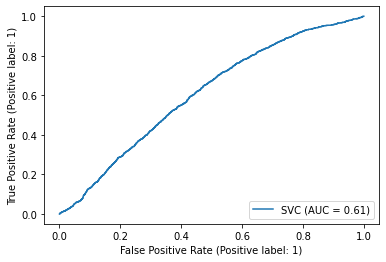

In [36]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(svc, x_test, y_test)
plt.show()

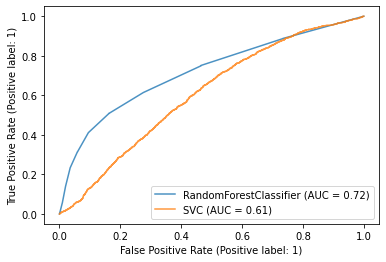

In [40]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(x_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, x_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

#### a.3.1.1. Avantages

Elle permet d’obtenir de bons résultats assez rapidement
Elle est basé sur des principes simples
Elle est simplement implémentable
Les calculs de l’apprentissage peuvent être facilement distribués

#### a.3.1.2.  Faiblesses

Son temps d’apprentissage peut parfois être un peu lent

### 4.	Techniques d'amélioration des resultats des modèles

Les resultats des differents modèles peuvent etre améliorés par la redimensionnement des variables (Features scaling).
Il s’agit de remettre toutes les variables d’entrée (features) à même échelles numériques.
La normalisation et/ou standardisation des données d’entrée peut améliorer la performance des algorithmes qui utilisent les entrées pondérées ou les mesures de distance.
#### Exemples d’algorithmes où la mise à l’échelle des variables est importante :
##### • k-means
##### • k nearest neighbors (kNN)
##### • Principal component analysis (PCA)
##### • Gradient descent